In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# KLASIFIKACIJA stablima odlucivanja

Za svaku supstancu postoji vise klasa koje mogu da se klasifikuju, stoga radice se klasifikacija svake supstance posebno

### UCITAVANJE I PREPROCESIRANJE PODATAKA
*deo koda uzet iz fajla za analizu podataka*

In [5]:
sirovi_podaci = pd.read_csv('../drug_consumption.data')
sirovi_podaci #fale imena atributa

#procitano sa sajtu podataka 
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

sirovi_podaci = pd.read_csv('../drug_consumption.data', names = kolone)

podaci = sirovi_podaci.copy()

#ID mi ne igra nikakvu ulogu svakako
podaci = podaci.drop('ID', axis = 1)

#semer je izmisljen
podaci = podaci.drop('Semer', axis = 1)

In [6]:
niska_korelacija = ['Age', 'Gender', 'Education', 'Alchocol','Ascore','Caff']
for column in niska_korelacija:
    podaci = podaci.drop(column, axis=1)
podaci.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsiveness,SS,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,CL2,CL0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,CL2,CL2,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,CL0,CL0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,CL0,CL0,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,CL1,CL1,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


In [7]:
podaci
print(f'Broj istanci: {podaci.shape[0]}')
print(f'Broj atributa: {podaci.shape[1]}')
podaci.describe()

Broj istanci: 1885
Broj atributa: 24


,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsiveness,SS
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000386,0.007216,-0.003292
std,0.700335,0.166226,0.998106,0.997448,0.996229,0.997523,0.954435,0.963701
min,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-2.555240,-2.078480
25%,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.652530,-0.711260,-0.525930
50%,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.006650,-0.217120,0.079870
75%,0.960820,-0.316850,0.629670,0.637790,0.723300,0.584890,0.529750,0.765400
max,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,2.901610,1.921730


In [8]:
podaci.isna().any().any() #nema nedostajucih vrednosti, sto je dobro

False

In [9]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Amphet':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Cscore', 'Impulsiveness', 'SS'], 

In [10]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Amphet', 'Amyl', 'Benzos', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA'], 
True


In [11]:
#skaliramo podatke
def skaliraj_podatke(X):
    return (X - min(X))/(max(X) - min(X))

In [12]:
# skalirani_podaci = podaci.copy()
# for a in atributi:
#     skalirani_podaci[a] = skaliraj_podatke(skalirani_podaci[a])
    
# #provera uspesnosti skaliranja
# for a in atributi:
#     print(len(skalirani_podaci[a].unique()) == len(podaci[a].unique()), end = ", ")
    
# #nismo izgubili podatke

In [13]:
skalirani_podaci = podaci.copy()

# KLASIFIKACIJA 

In [14]:
# klase su poprilicno nebalnsirane...

In [15]:
# POMOCNA FJA ZA GRAFICKI PRIKAZ, kod uzet sa vezbi
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored, cprint

def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
#     vrste = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    kolone = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns = kolone, index = kolone))
    print("---------------------------------------------------------------------------------")

def report(model, x, y, text = "trening", ):
    y_pred = model.predict(x)
    
    print(colored('\t' + f'Klasifikacioni izveštaj za model {type(model).__name__} nad {text} podacima', 'blue', attrs= ['bold']))
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])
    cprint(classification_report(y, y_pred), attrs= ['dark']) 
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])

In [16]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=klase, feature_names=atributi, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

## Priprema modela

In [17]:
#provera klasifikacije nad jednom klasom (za sad)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
podaci_bez_klasa = skalirani_podaci.copy()
for x in klase:
    podaci_bez_klasa = podaci_bez_klasa.drop(x, axis = 1)
podaci_bez_klasa.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsiveness,SS
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575


In [19]:
klasa = podaci[klase[0]]
print(podaci_bez_klasa.shape, end = " ")
print(klasa.shape)

(1885, 8) (1885,)


In [20]:
# treba izvrsiti balansiranje podataka, zasad pokusavam bez nad prvom klasom
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)

In [21]:
print(X_train.shape, X_test.shape)

(1319, 8) (566, 8)


In [22]:
# nakon particionisanja podataka kreiramo model
drvo_klasifikacije = DecisionTreeClassifier()
drvo_klasifikacije.fit(X_train, y_train)

DecisionTreeClassifier()

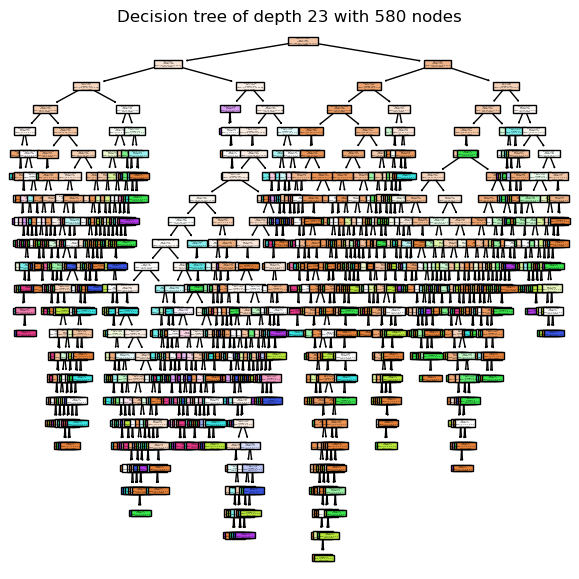

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [23]:
plot_decision_tree(drvo_klasifikacije, atributi)

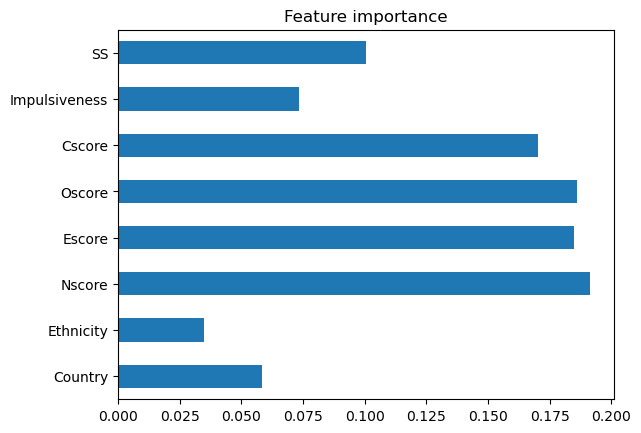

In [24]:
pd.Series(drvo_klasifikacije.feature_importances_, index=podaci_bez_klasa.columns).plot.barh()
plt.title("Feature importance")
plt.show()

 najbitniji atributi su lepo balansirani...

In [25]:
report_imbalanced(drvo_klasifikacije, X_train, y_train, "Train")

Classification report for model DecisionTreeClassifier on Train data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       1.00      1.00      1.00      1.00      1.00      1.00       683
        CL1       1.00      1.00      1.00      1.00      1.00      1.00       161
        CL2       1.00      1.00      1.00      1.00      1.00      1.00       170
        CL3       1.00      1.00      1.00      1.00      1.00      1.00       139
        CL4       1.00      1.00      1.00      1.00      1.00      1.00        52
        CL5       1.00      1.00      1.00      1.00      1.00      1.00        43
        CL6       1.00      1.00      1.00      1.00      1.00      1.00        71

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      1319

---------------------------------------------------------------------------------
Confusion matrix 

deluje da se preprilagodio...

In [26]:
report_imbalanced(drvo_klasifikacije, X_test, y_test, "Train")

Classification report for model DecisionTreeClassifier on Train data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       0.61      0.59      0.60      0.60      0.59      0.35       293
        CL1       0.13      0.13      0.88      0.13      0.34      0.11        69
        CL2       0.12      0.12      0.87      0.12      0.33      0.10        73
        CL3       0.17      0.20      0.88      0.18      0.42      0.17        59
        CL4       0.00      0.00      0.96      0.00      0.00      0.00        23
        CL5       0.18      0.17      0.97      0.17      0.40      0.15        18
        CL6       0.16      0.16      0.95      0.16      0.39      0.14        31

avg / total       0.38      0.37      0.74      0.38      0.47      0.24       566

---------------------------------------------------------------------------------
Confusion matrix 

radi uzasno lose

In [27]:
# pokusavam da promenim velicinu test/train skupova

from sklearn.metrics import accuracy_score
velicine_skupova = [1/6, 1/3, 0.3, 0.5, 0.67]

for i in range(5):
    
    X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = velicine_skupova[i] , stratify= klasa, random_state= 42)
    
    drvo_klasifikacije = DecisionTreeClassifier()
    drvo_klasifikacije.fit(X_train, y_train)
    
    pred = drvo_klasifikacije.predict(X_test)
    print(f'{round(velicine_skupova[i], 2)}: Preciznost {round(accuracy_score(y_test, pred), 2)}')
    #report(drvo_klasifikacije, X_tests[i], y_tests[i], text= 'test')
    


0.17: Preciznost 0.36
0.33: Preciznost 0.36
0.3: Preciznost 0.37
0.5: Preciznost 0.36
0.67: Preciznost 0.38


ni to nesto ne pomaze...

In [28]:
# pokusavam sa dummy podacima

In [29]:
klasa = pd.get_dummies(klasa)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)

In [31]:
drvo_klasifikacije = DecisionTreeClassifier()
drvo_klasifikacije.fit(X_train, y_train)

DecisionTreeClassifier()

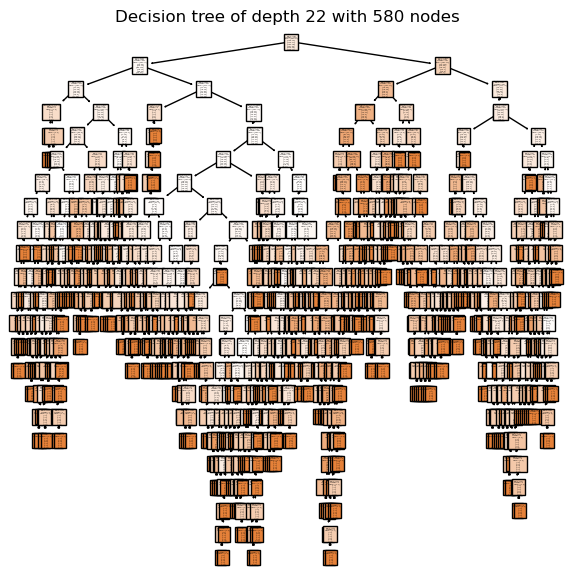

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [32]:
plot_decision_tree(drvo_klasifikacije, atributi)

In [33]:
report(drvo_klasifikacije, X_train, y_train, "Train")

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad Train podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       1.00      1.00      1.00       161
           2       1.00      1.00      1.00       170
           3       1.00      1.00      1.00       139
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        71

   micro avg       1.00      1.00      1.00      1319
   macro avg       1.00      1.00      1.00      1319
weighted avg       1.00      1.00      1.00      1319
 samples avg       1.00      1.00      1.00      1319

----------------------------------------------------------------------------------------------


In [34]:
report(drvo_klasifikacije, X_test, y_test, "Test")

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad Test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       293
           1       0.06      0.07      0.07        69
           2       0.17      0.23      0.20        73
           3       0.28      0.22      0.25        59
           4       0.12      0.13      0.13        23
           5       0.00      0.00      0.00        18
           6       0.15      0.13      0.14        31

   micro avg       0.38      0.38      0.38       566
   macro avg       0.20      0.20      0.20       566
weighted avg       0.39      0.38      0.38       566
 samples avg       0.38      0.38      0.38       566

----------------------------------------------------------------------------------------------


nista bolje...

### Podevanje hiperparametara

In [35]:
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)

In [36]:
# menjamo parametre
parametri =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 30)],
    'max_features': [x for x in range(3, 40)]
}

balansirano_drvo = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'), param_grid= parametri)

In [37]:
#pokusavamo sa balansiranim drvetom
balansirano_drvo.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24, 25, 26, 27, 28, 29, 30, 31,
                                          32, ...]})

In [38]:
# print(balansirano_drvo.best_params_)
print(balansirano_drvo.best_score_)

0.40259246456965087


In [39]:
najbolji_parametri = balansirano_drvo.best_params_
print(najbolji_parametri)

{'criterion': 'entropy', 'max_depth': 28, 'max_features': 3}


In [40]:
drvo = DecisionTreeClassifier(criterion = 'gini', max_depth = 22, max_features = 4)

In [41]:
drvo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=22, max_features=4)

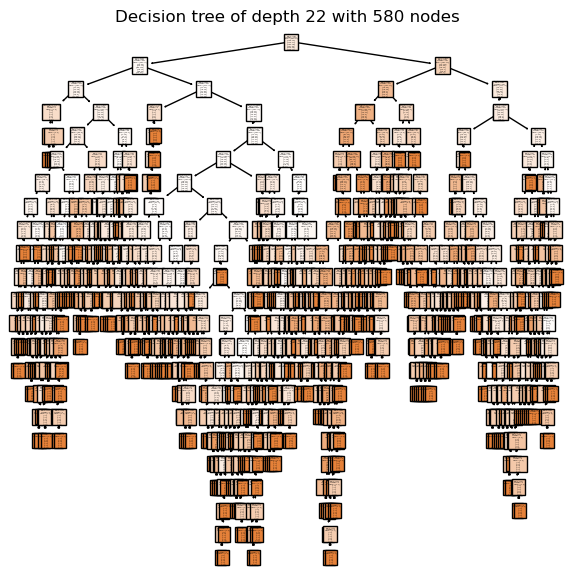

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [42]:
plot_decision_tree(drvo_klasifikacije, atributi)

In [43]:
report(drvo, X_test, y_test)

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad trening podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       293
           1       0.21      0.25      0.23        69
           2       0.16      0.16      0.16        73
           3       0.22      0.25      0.24        59
           4       0.06      0.04      0.05        23
           5       0.07      0.06      0.06        18
           6       0.12      0.13      0.12        31

   micro avg       0.38      0.38      0.38       566
   macro avg       0.21      0.21      0.21       566
weighted avg       0.39      0.38      0.39       566
 samples avg       0.38      0.38      0.38       566

----------------------------------------------------------------------------------------------


In [44]:
klasa = podaci['Amphet']

##  balansiranje

In [45]:
# kod uzet sa casa
from collections import Counter
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    print(colored("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(Y).items()), "green"))
    print(colored("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()), "blue"))
    return X_resampled, y_resampled
    

In [46]:
def visualize(X, X_resampled, Y, Y_resampled, x_opacity=0.5):
    """
        x_opacity - [0, 1] -> prozirnost elemenata klase (podešavati u odnosu na to da li prikazujemo samo 1 klasu ili obe)
    """
    
    #Da bismo vizuelizovali, iskoristicemo PCA da smanjimo na 2 dimenzije
    
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled) 
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, y_resampled]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:, 0], X_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title('{} resampling'.format("After" if i else "Before"), c = 'blue' if i else 'green')
    plt.show()

In [47]:
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test):
    model = DecisionTreeClassifier(criterion = 'gini', max_depth = 22, max_features = 4)
    model.fit(X_train, Y_train)
    report_imbalanced(model, X_train, Y_train)
    report_imbalanced(model, X_test, Y_test)
    return model

In [48]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)

Number of instances before resampling with RandomOverSampler : dict_items([('CL0', 683), ('CL3', 139), ('CL2', 170), ('CL1', 161), ('CL5', 43), ('CL6', 71), ('CL4', 52)]). 
Number of instances after  resampling with RandomOverSampler : dict_items([('CL0', 683), ('CL3', 139), ('CL2', 170), ('CL1', 161), ('CL5', 683), ('CL6', 71), ('CL4', 52)]). 


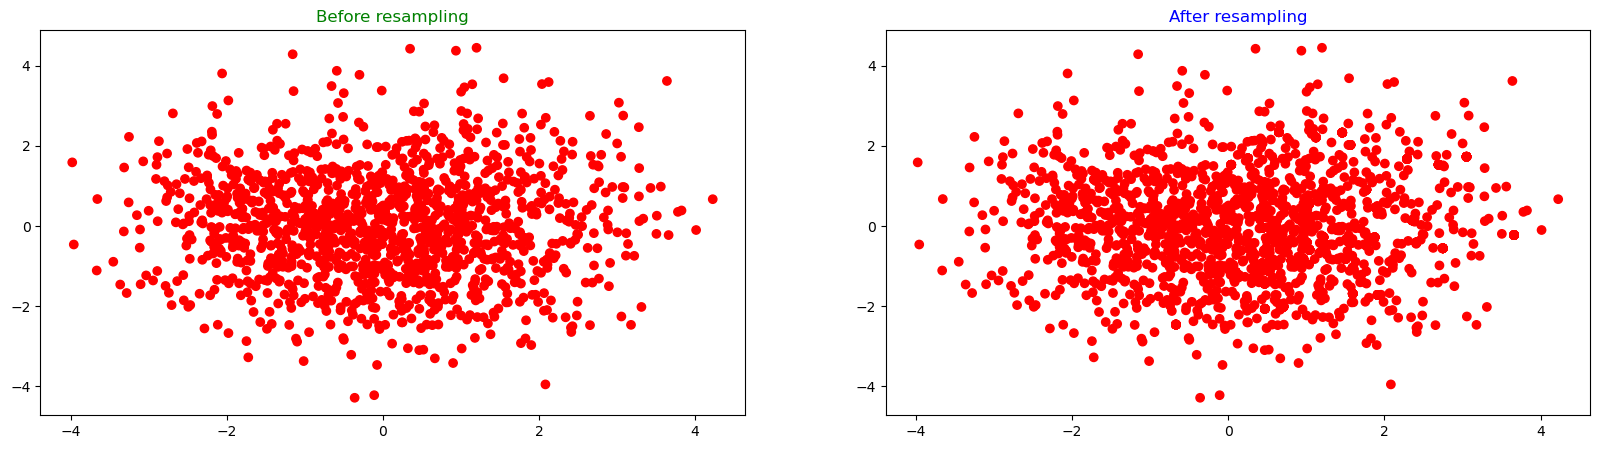

In [50]:
X_resampled, y_resampled = resample(ros, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [51]:
model_ros = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       1.00      1.00      1.00      1.00      1.00      1.00       683
        CL1       1.00      0.99      1.00      1.00      1.00      0.99       161
        CL2       1.00      0.99      1.00      1.00      1.00      0.99       170
        CL3       1.00      0.99      1.00      0.99      0.99      0.98       139
        CL4       1.00      0.98      1.00      0.99      0.99      0.98        52
        CL5       0.99      1.00      0.99      0.99      1.00      0.99       683
        CL6       1.00      0.97      1.00      0.99      0.99      0.97        71

avg / total       0.99      0.99      1.00      0.99      1.00      0.99      1959

---------------------------------------------------------------------------------
Confusion matr

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=10, random_state=42)

In [53]:
# k = [3, 5, 7, 10, 12, 15, 17, 23]

# for x in k:
#     smote = SMOTE(k_neighbors = x, random_state = 42)
#     X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)
#     X_resampled, y_resampled = resample(smote, X_train, y_train)
#     visualize(X_train, X_resampled, y_train, y_resampled, 0)

#     model = DecisionTreeClassifier(max_depth=7, min_samples_split=25, criterion='gini')
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
    
#     print(f'{x}: Preciznost {round(accuracy_score(y_test, pred), 2)}')

Number of instances before resampling with SMOTE : dict_items([('CL0', 683), ('CL3', 139), ('CL2', 170), ('CL1', 161), ('CL5', 43), ('CL6', 71), ('CL4', 52)]). 
Number of instances after  resampling with SMOTE : dict_items([('CL0', 683), ('CL3', 683), ('CL2', 683), ('CL1', 683), ('CL5', 683), ('CL6', 683), ('CL4', 683)]). 


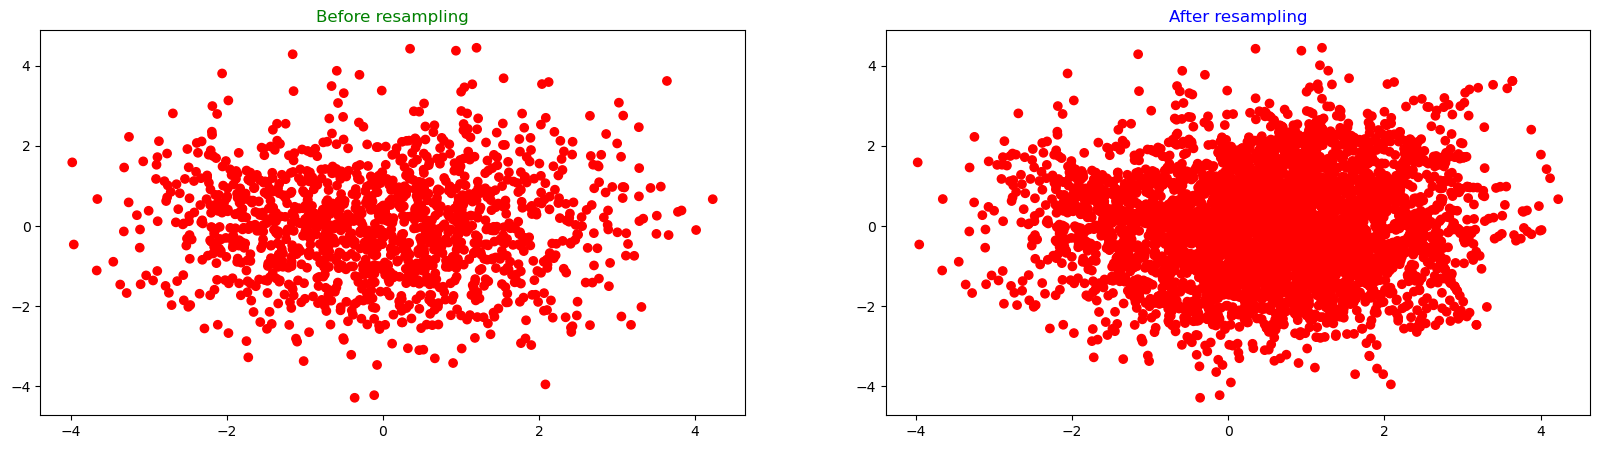

In [54]:
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size = 0.30, stratify = klasa, random_state= 42)
X_resampled, y_resampled = resample(smote, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [55]:
model_smote = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       1.00      1.00      1.00      1.00      1.00      1.00       683
        CL1       1.00      1.00      1.00      1.00      1.00      1.00       683
        CL2       1.00      1.00      1.00      1.00      1.00      1.00       683
        CL3       1.00      1.00      1.00      1.00      1.00      1.00       683
        CL4       1.00      1.00      1.00      1.00      1.00      1.00       683
        CL5       1.00      1.00      1.00      1.00      1.00      1.00       683
        CL6       1.00      1.00      1.00      1.00      1.00      1.00       683

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      4781

---------------------------------------------------------------------------------
Confusion matr

balansiranje klasa nije pripomoglo...

## pokusavam da klasifikujem svaku klasu sad... (mozda je problem samo u ovoj klasi)

In [56]:
#pravi skupove podataka pojedinacno bez svake klase
podaci_bez_klase = []
for x in atributi:
    podaci_bez_klase.append(podaci_bez_klasa.drop(x, axis = 1))
    
#klasni_podaci, isto to
klasni_podaci = []
n = len(klase)
for i in range(n):
    klasni_podaci.append(podaci[klase[i]])
# klasni_podaci[12]

In [57]:
#delimo podatke na train/test skupove
X_trains, X_tests, y_trains, y_tests = [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)]
n = len(klase)
preciznosti = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasni_podaci[i], test_size = 0.30,  random_state = 42)

    drvo.fit(X_train, y_train)
    print(klase[i])
    report(drvo, X_test, y_test, text= 'test')
    
    predicted = drvo.predict(X_test)
    preciznosti.append(round(accuracy_score(y_test, predicted), 4))
    

Amphet
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.61      0.59      0.60       295
         CL1       0.17      0.14      0.15        77
         CL2       0.17      0.23      0.19        66
         CL3       0.32      0.27      0.29        60
         CL4       0.21      0.13      0.16        23
         CL5       0.00      0.00      0.00        19
         CL6       0.08      0.12      0.09        26

    accuracy                           0.39       566
   macro avg       0.22      0.21      0.21       566
weighted avg       0.40      0.39      0.40       566

----------------------------------------------------------------------------------------------
Amyl
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
---------------------------------------------------

VSA
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.79      0.78      0.78       433
         CL1       0.03      0.03      0.03        59
         CL2       0.10      0.13      0.11        39
         CL3       0.00      0.00      0.00        22
         CL4       0.00      0.00      0.00         2
         CL5       0.00      0.00      0.00         9
         CL6       0.00      0.00      0.00         2

    accuracy                           0.61       566
   macro avg       0.13      0.13      0.13       566
weighted avg       0.61      0.61      0.61       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

In [58]:
preciznosti

[0.394,
 0.5212,
 0.3587,
 0.2438,
 0.3392,
 0.4134,
 0.742,
 0.4382,
 0.7102,
 0.6537,
 0.4523,
 0.3975,
 0.6148,
 0.3887,
 0.2085,
 0.6078]

In [59]:
# #BALANSIRANO DRVO, SA PODESENIM PARAMETRIMA
# preciznosti = []
# for i in range(n):
#     balansirano_drvo.fit(X_trains[i], y_trains[i])
#     print(f'{klase[i]}: {balansirano_drvo.best_score_}')
#     preciznosti.append(balansirano_drvo.best_score_)

In [60]:
# ne radi bas najbolje za sve

# pokusavam da dodam atribute koristeci i ostale klase

In [61]:
podaci_skalirano = podaci.copy()

n = len(podaci_skalirano['Heroin'])
    
for x in klase:
    for i in range(n):
        podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))
    print(podaci_skalirano[x].unique())
        

podaci_skalirano

[2 0 1 3 5 4 6]
[0 2 1 3 5 4 6]
[2 0 3 1 4 5 6]
[0 4 3 2 1 6 5]
[5 6 4 0 3 2 1]
[0 3 2 1 6 5 4]
[0 1 2 3 5 4 6]
[0 4 1 3 2 6 5]
[0 1 2 3 5 6 4]
[0 2 3 1 5 4 6]
[0 1 2 3 5 4 6]
[0 2 1 3 4 5 6]
[0 3 1 6 4 2 5]
[0 1 2 3 4 5 6]
[2 4 0 6 1 3 5]
[0 1 3 6 2 5 4]


/tmp/ipykernel_6661/2619896397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))


,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsiveness,SS,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,2,0,...,0,0,0,0,0,0,0,0,2,0
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,...,0,4,0,2,0,2,3,0,4,0
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,0,0,...,0,0,0,2,0,0,0,0,2,0
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,1,1,...,0,1,0,0,1,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.57009,-0.31685,-1.19430,1.74091,1.88511,-1.13788,0.88113,1.92173,0,0,...,0,0,0,0,3,3,0,0,0,5
1881,-0.57009,-0.31685,-0.24649,1.74091,0.58331,-1.51840,0.88113,0.76540,0,0,...,0,2,0,0,3,5,4,4,5,0
1882,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.38502,0.52975,-0.52593,6,5,...,0,4,0,2,0,2,0,2,6,0
1883,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-2.57309,1.29221,1.22470,0,0,...,0,3,0,0,3,3,0,3,4,0


In [62]:
# treba mi za klasifikaciju
for x in klase:
    podaci_skalirano[x] = podaci_skalirano[x].astype('float64')
    
# podaci_skalirano.dtypes

In [63]:
# #skaliram podatke
# for a in atributi:
#     podaci_skalirano[a] = skaliraj_podatke(podaci_skalirano[a])
# for a in klase:
#     podaci_skalirano[a] = skaliraj_podatke(podaci_skalirano[a])
# podaci_skalirano.describe()

In [64]:
#pravi skupove podataka pojedinacno bez svake klase
podaci_bez_klase = []
for x in klase:
    podaci_bez_klase.append(podaci_skalirano.drop(x, axis = 1))
    
#klasni_podaci, isto to
klasni_podaci = []
n = len(klase)
for i in range(n):
    klasni_podaci.append(podaci[klase[i]])
    
len(podaci_bez_klase)

16

In [65]:
#delimo podatke na train/test skupove
n = len(podaci_bez_klase)
X_trains, X_tests, y_trains, y_tests = [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)]
for i in range(n):
    X_trains[i], X_tests[i], y_trains[i], y_tests[i] = train_test_split(podaci_bez_klase[i], klasni_podaci[i], test_size = 0.30,  random_state = 42)

#proverimo podatke (dobri su)
# for i in range(n):
#     print(X_trains[i].shape != X_trains[0].shape, end = ' ')
    
#y_trains[i]

In [66]:
from sklearn.tree import DecisionTreeClassifier
drvo_klasifikacije = DecisionTreeClassifier()
drvo_klasifikacije.fit(X_trains[0], y_trains[0])

DecisionTreeClassifier()

In [67]:
# plot_decision_tree(drvo_klasifikacije, podaci.columns)

In [68]:
report(drvo_klasifikacije, X_tests[0], y_tests[0], text= 'test')

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.81      0.76      0.78       295
         CL1       0.41      0.39      0.40        77
         CL2       0.37      0.39      0.38        66
         CL3       0.23      0.25      0.24        60
         CL4       0.04      0.04      0.04        23
         CL5       0.06      0.05      0.06        19
         CL6       0.11      0.15      0.12        26

    accuracy                           0.53       566
   macro avg       0.29      0.29      0.29       566
weighted avg       0.55      0.53      0.54       566

----------------------------------------------------------------------------------------------


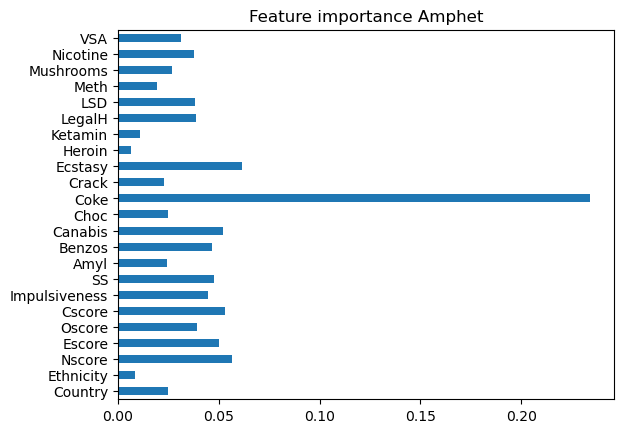

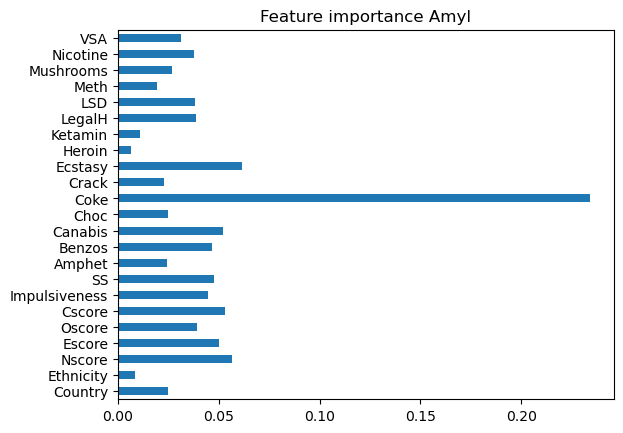

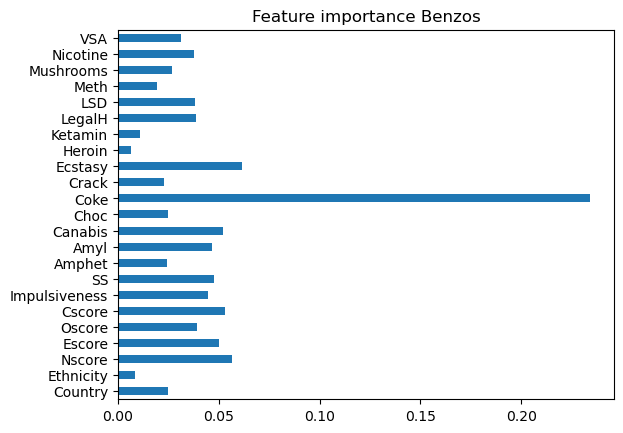

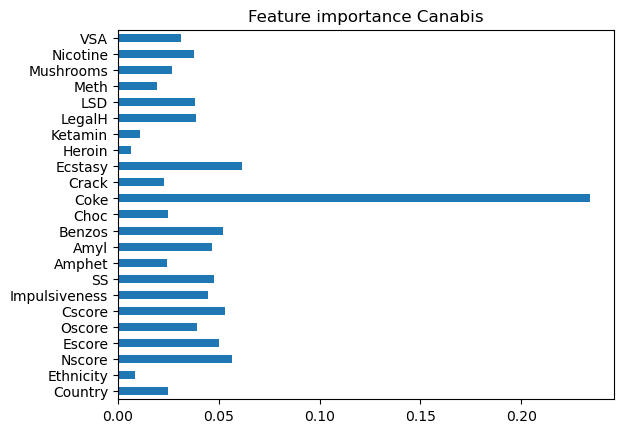

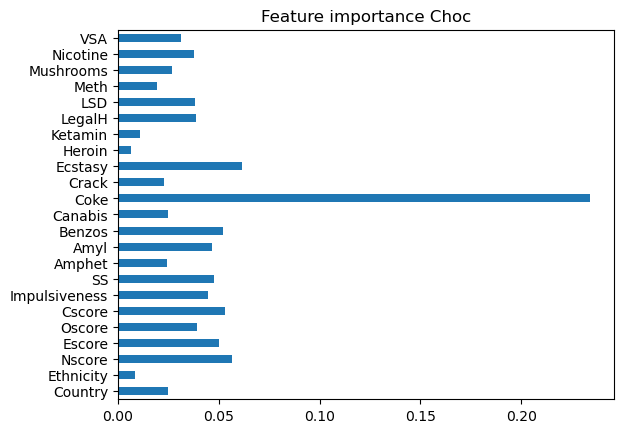

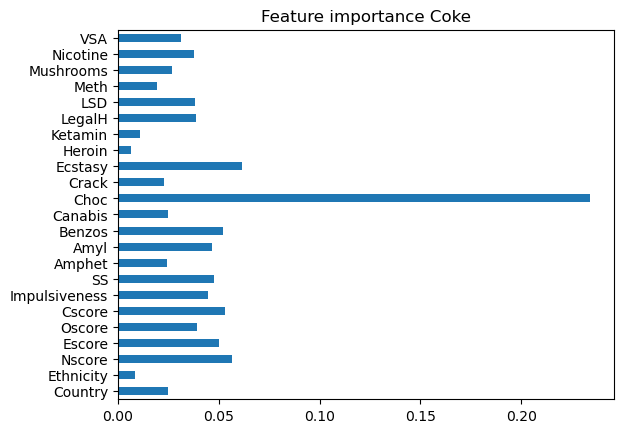

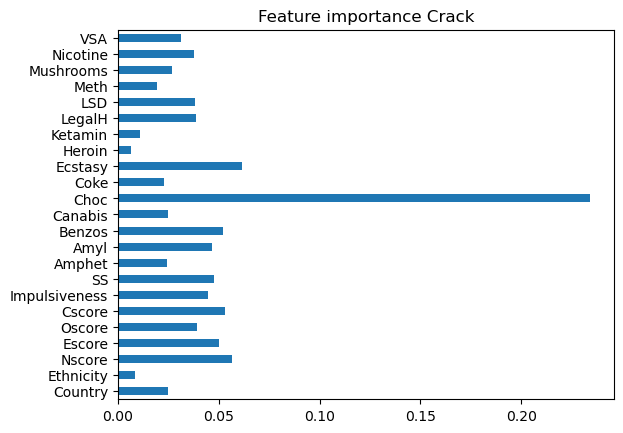

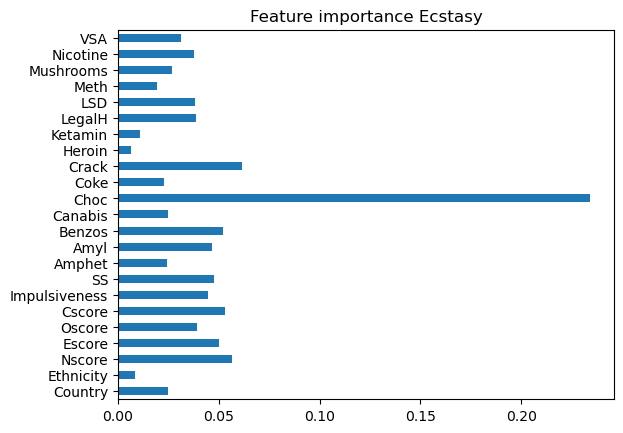

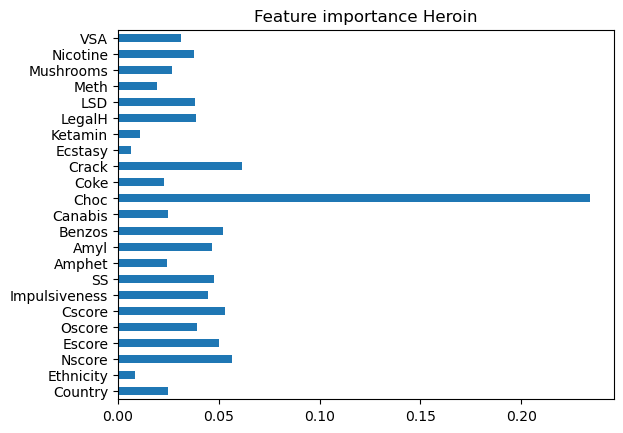

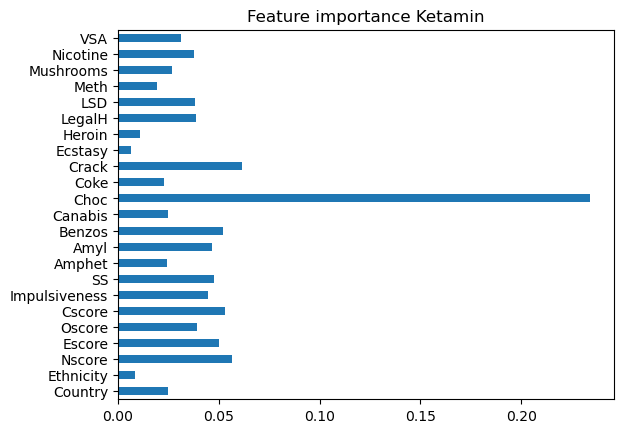

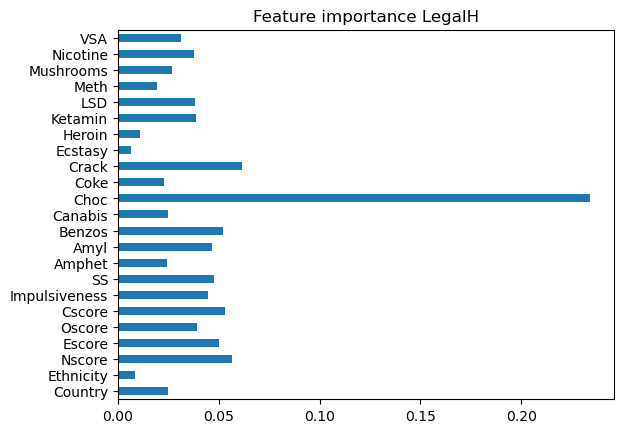

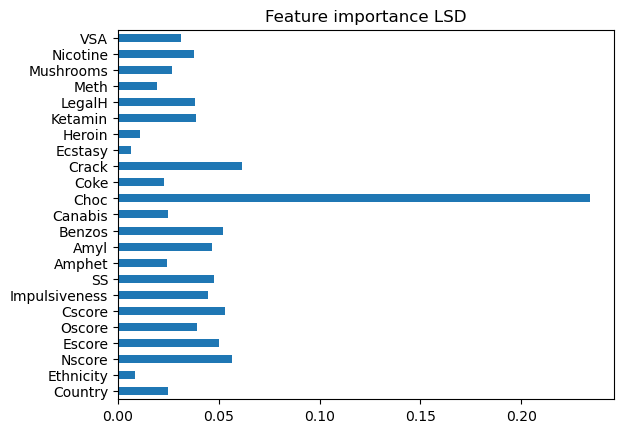

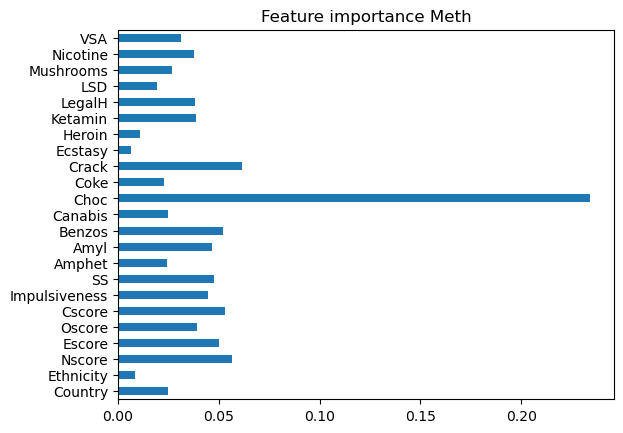

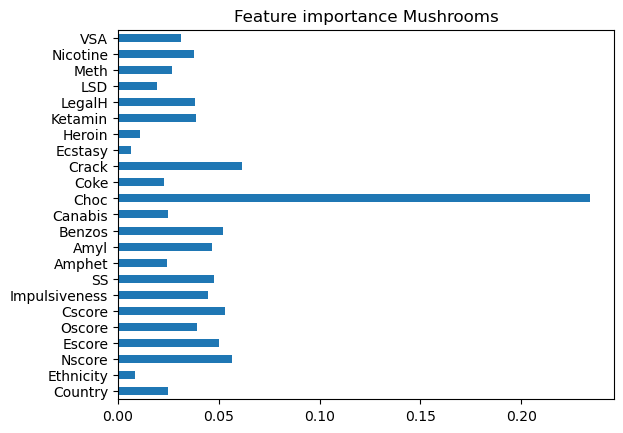

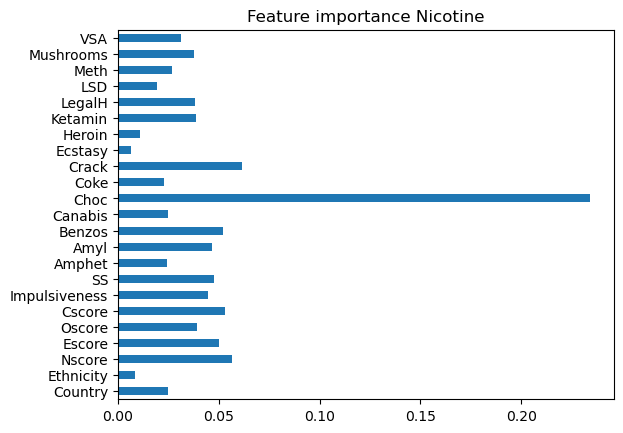

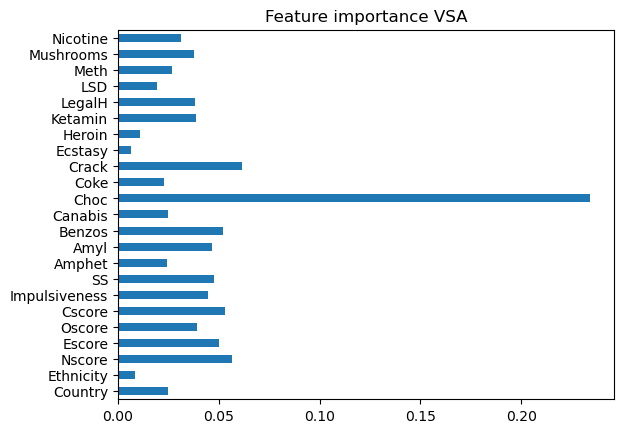

In [69]:
for i in range(n):
    pd.Series(drvo_klasifikacije.feature_importances_, index=podaci_bez_klase[i].columns).plot.barh()
    plt.title(f'Feature importance {klase[i]}')
    plt.show()

In [70]:
preciznosti_klase = []
from sklearn.metrics import accuracy_score
for i in range(n):
    drvo.fit(X_trains[i], y_trains[i])
    
    pred = drvo.predict(X_tests[i])
    preciznosti_klase.append(round(accuracy_score(y_tests[i], pred), 2))
    print(f'{klase[i]}: {round(accuracy_score(y_tests[i], pred), 2)}')
    #report(drvo_klasifikacije, X_tests[i], y_tests[i], text= 'test')

Amphet: 0.56
Amyl: 0.63
Benzos: 0.45
Canabis: 0.37
Choc: 0.34
Coke: 0.55
Crack: 0.81
Ecstasy: 0.58
Heroin: 0.8
Ketamin: 0.7
LegalH: 0.52
LSD: 0.57
Meth: 0.64
Mushrooms: 0.54
Nicotine: 0.31
VSA: 0.65


In [71]:
preciznosti

[0.394,
 0.5212,
 0.3587,
 0.2438,
 0.3392,
 0.4134,
 0.742,
 0.4382,
 0.7102,
 0.6537,
 0.4523,
 0.3975,
 0.6148,
 0.3887,
 0.2085,
 0.6078]

In [72]:
preciznosti_klase

[0.56,
 0.63,
 0.45,
 0.37,
 0.34,
 0.55,
 0.81,
 0.58,
 0.8,
 0.7,
 0.52,
 0.57,
 0.64,
 0.54,
 0.31,
 0.65]

In [73]:
len(preciznosti_klase) == len(preciznosti)

True

In [74]:
n = len(preciznosti_klase)

## PCA

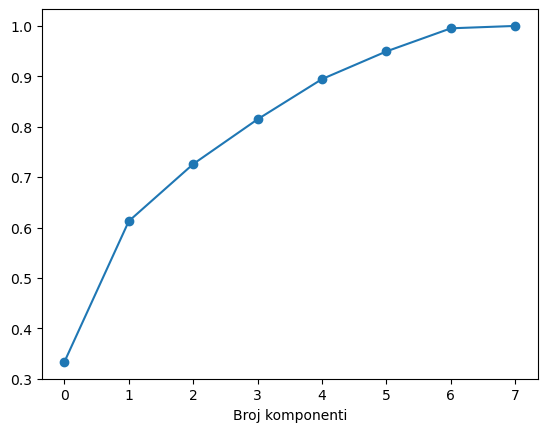

In [75]:
#samo atributi
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.show()

In [76]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(podaci_bez_klase[0], podaci['Amphet'], test_size = 0.3, random_state = 42 )

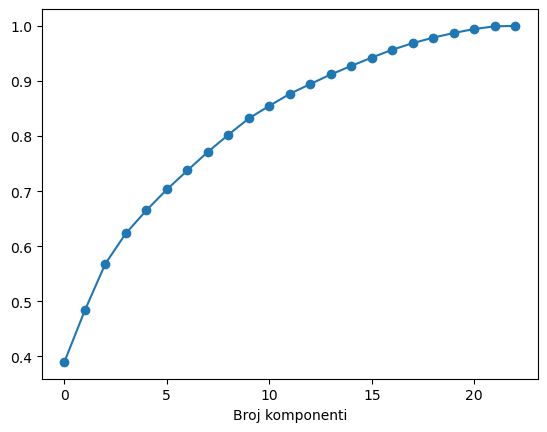

In [77]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train1)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.show()

PCA i ne pomaze nesto 

# REZULTATI

In [78]:
modeli = ["Samo atributi", "Sve klase"]

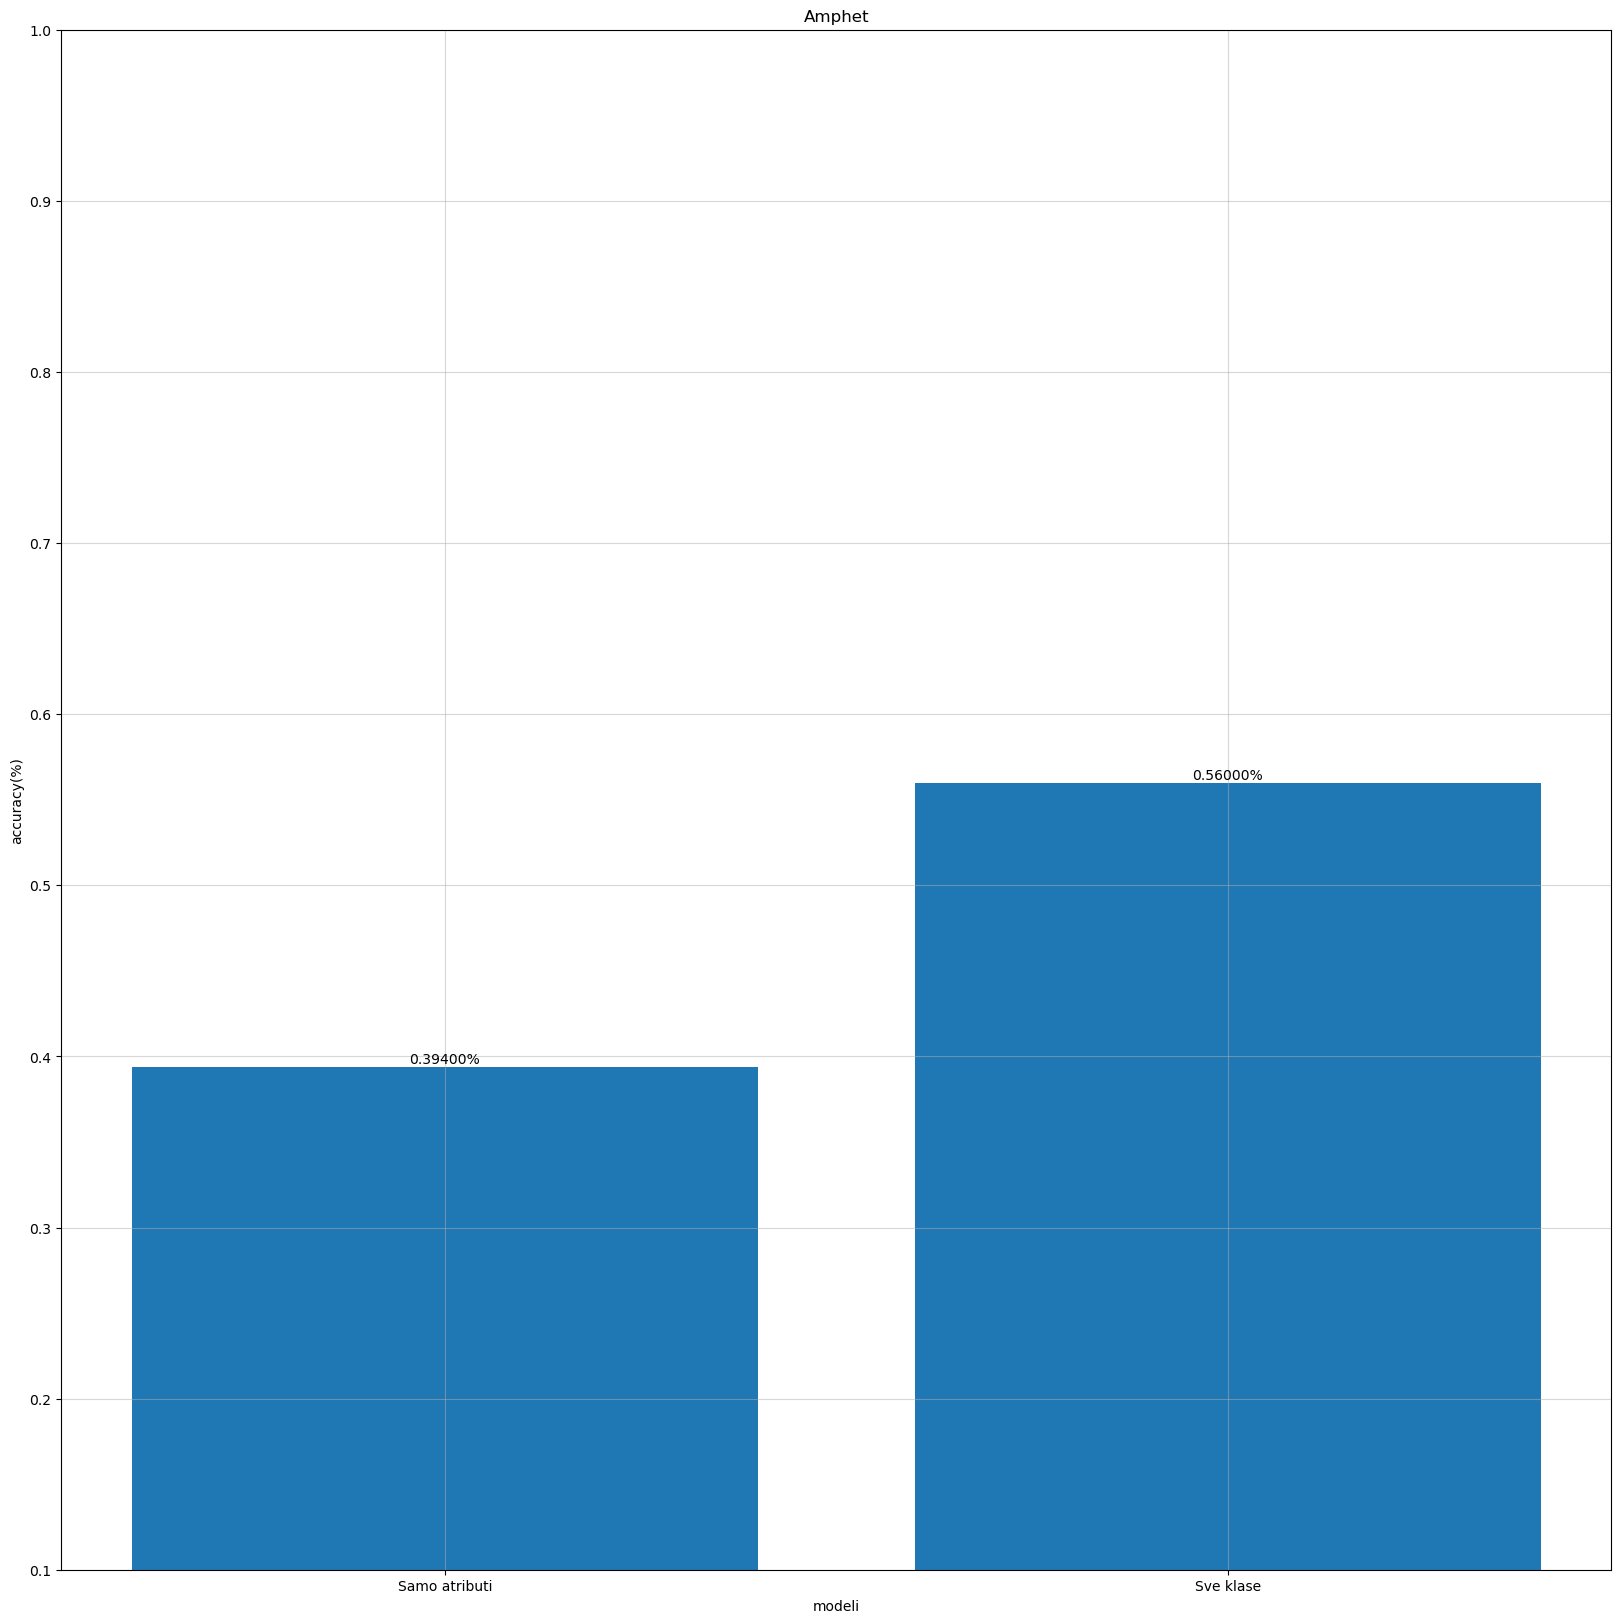

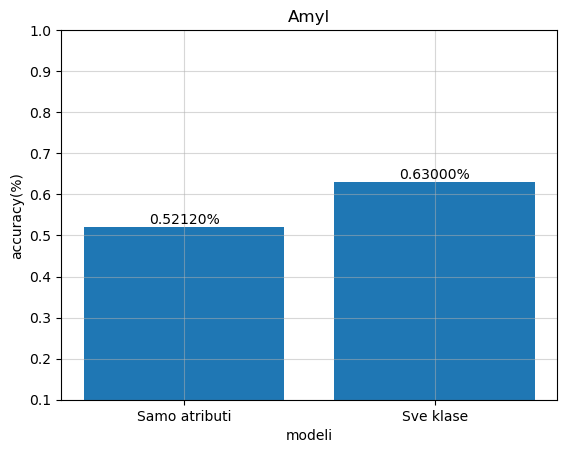

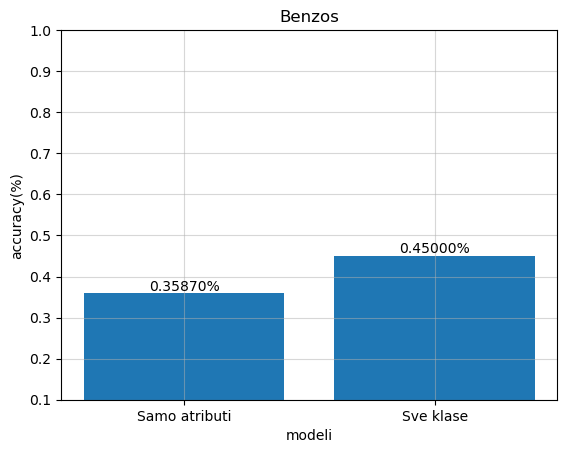

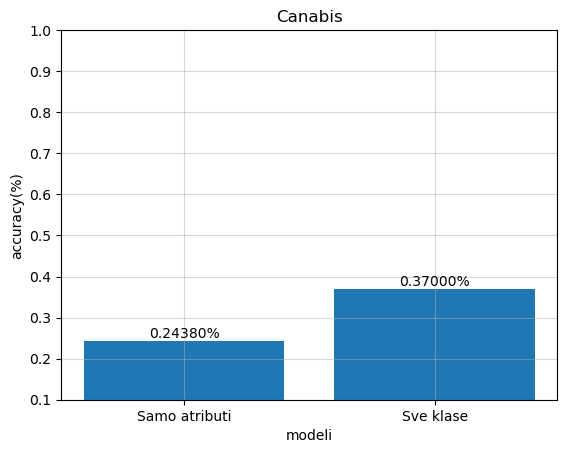

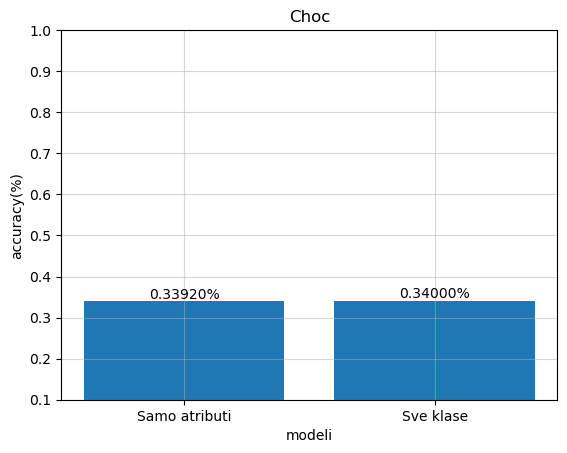

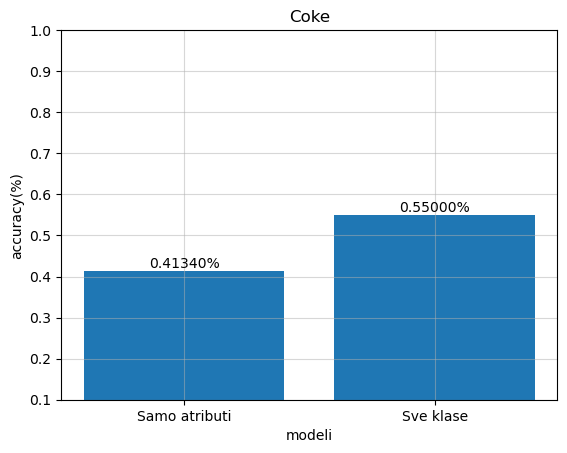

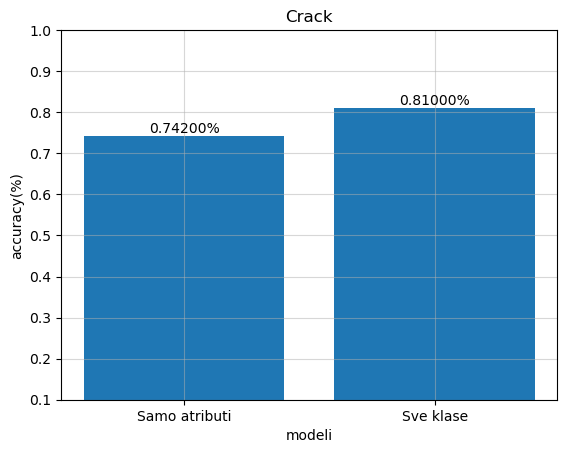

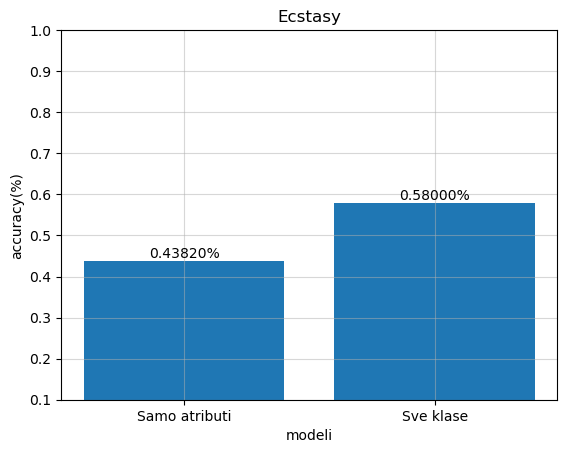

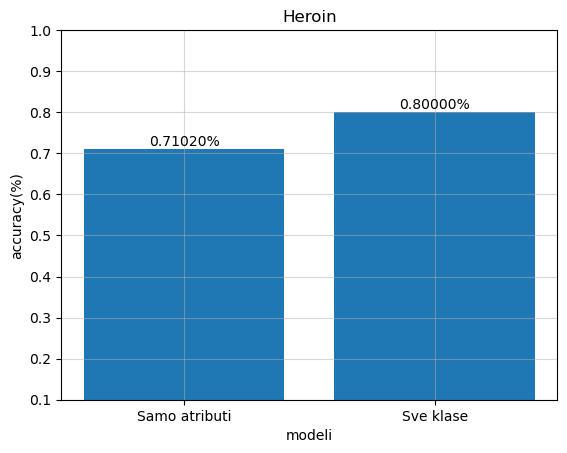

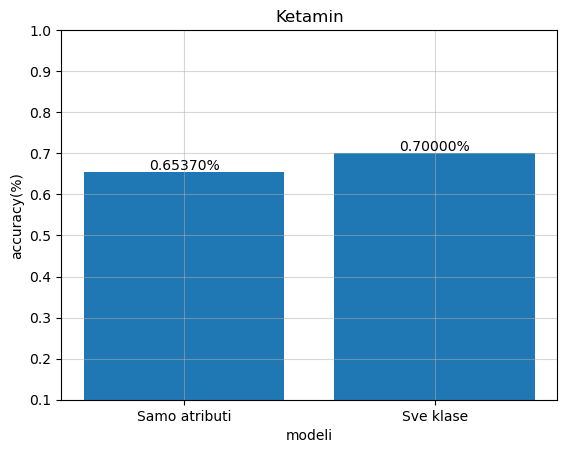

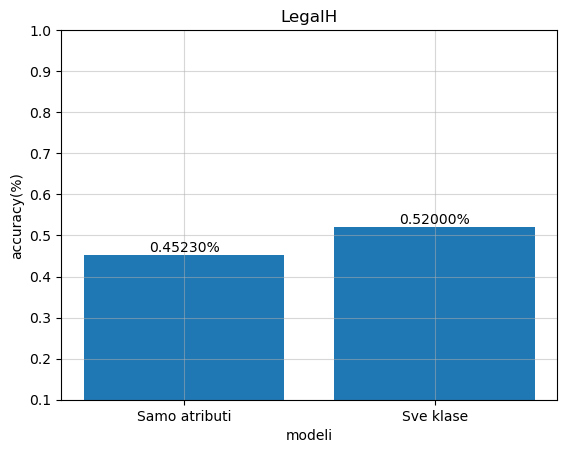

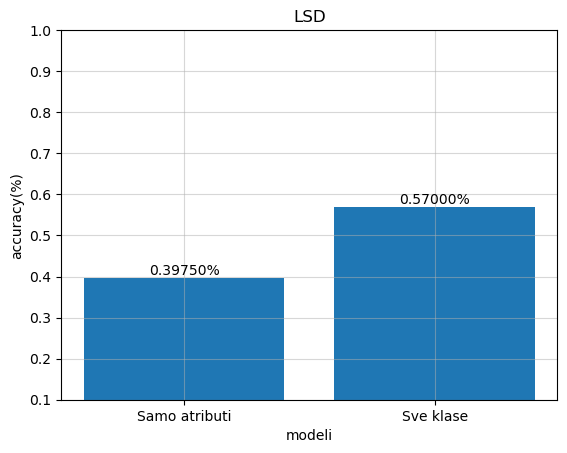

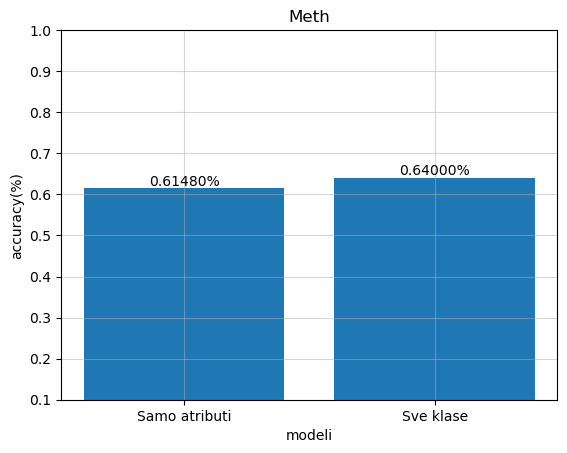

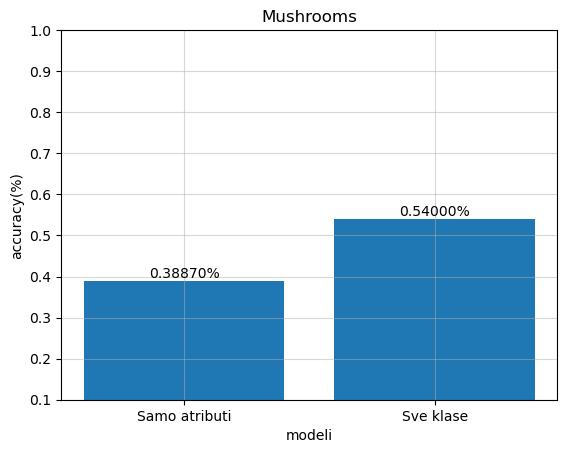

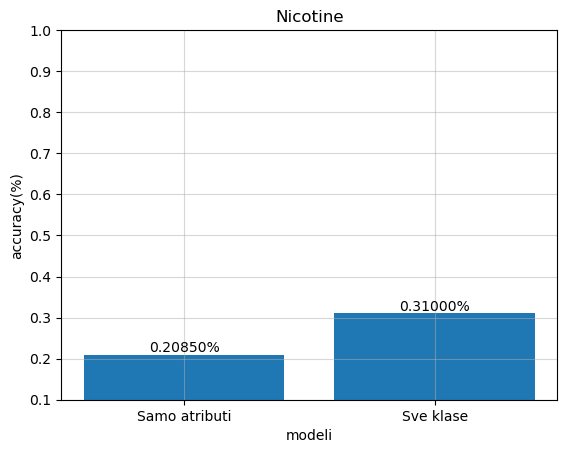

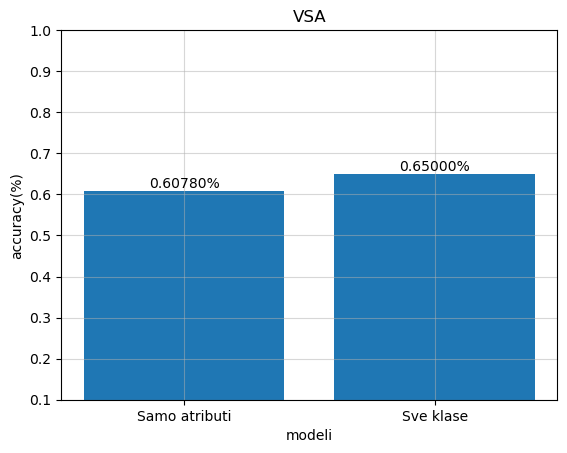

In [79]:
plt.figure(figsize = (20, 20))
for i in range(n):
    plt.title(f'{klase[i]}')
    vrednosti = [preciznosti[i], preciznosti_klase[i]]
    plt.bar(modeli, vrednosti)
    plt.grid(alpha = 0.5)
    plt.ylim(0.1, 1.0)
    for j, s in enumerate(vrednosti):
        plt.text(modeli[j], s, f'{s:.5f}%', ha='center', va='bottom')
    plt.xlabel('modeli')
    plt.ylabel('accuracy(%)')
    plt.show()


In [80]:
def prosek(niz):
    return sum(niz) / len(niz)
proseci = [prosek(preciznosti), prosek(preciznosti_klase)]

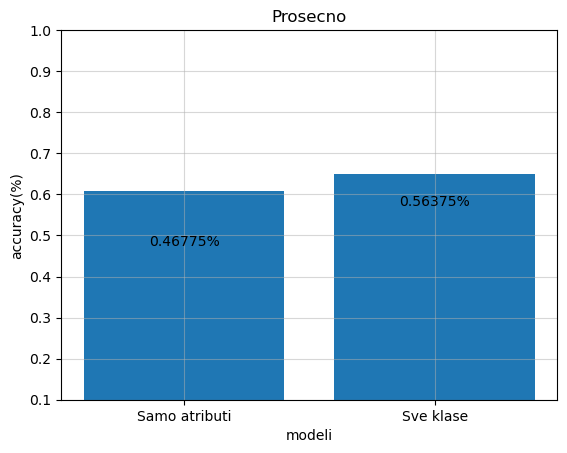

In [81]:
plt.title("Prosecno")
plt.bar(modeli, vrednosti)
plt.grid(alpha = 0.5)
plt.ylim(0.1, 1.0)
for j, s in enumerate(proseci):
    plt.text(modeli[j], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('modeli')
plt.ylabel('accuracy(%)')
plt.show()

In [82]:
najbolji_parametri

{'criterion': 'entropy', 'max_depth': 28, 'max_features': 3}

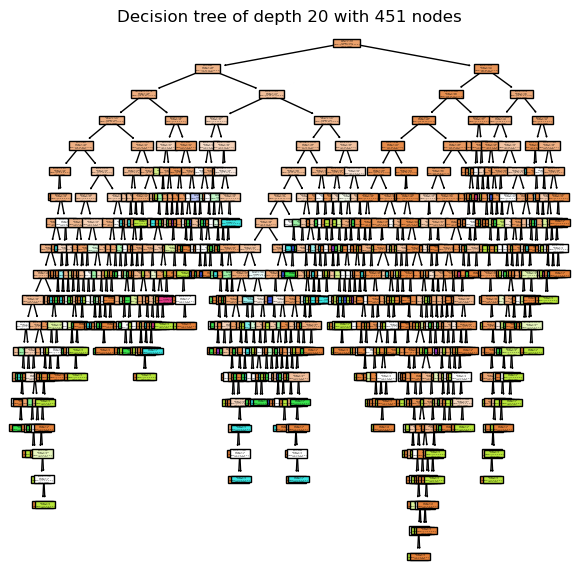

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 28
max_features 3
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [84]:
# eksport modela
drvo = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, max_features = 3)
drvo.fit(X_train, y_train)
plot_decision_tree(drvo, atributi)

In [85]:
import joblib
joblib.dump(drvo, './Modeli/Stablo.pkl')

['./Modeli/Stablo.pkl']